Implement neural network from scratch using python for the following datasets and predict the values for the following datasets:

The seeds dataset: https://archive.ics.uci.edu/ml/datasets/seeds

### Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading Dataset

In [9]:
df = pd.read_csv("seeds.csv")
m=df.shape[0]               # m--> number of rows
n=df.shape[1]               # n--> number of columns
df

,AREA,PERIMETER,COMPACTNESS,LENGTH,WIDTH,ASSYMMETRY_COEFFICIENT,GROOVE_LENGTH,TYPE
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
135,15.38,14.66,0.8990,5.477,3.465,3.600,5.439,2
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,2
137,15.57,15.15,0.8527,5.920,3.231,2.640,5.879,2
138,15.60,15.11,0.8580,5.832,3.286,2.725,5.752,2


### Scaling the Dataset

In [11]:
sc = StandardScaler()
df.iloc[:,:]=sc.fit_transform(df.iloc[:,:])

x_train, x_test, y_train, y_test = [i.to_numpy() for i in train_test_split(df.iloc[:,:n-1],df.iloc[:,-1],test_size=0.2)]
# 80-20 ratio split of the data and convertion to numpy array


print("Size of train_x : {}".format(x_train.shape))
print("Size of train_y : {}".format(y_train.shape))
print("Size of test_x : {}".format(x_test.shape))
print("Size of test_y : {}".format(y_test.shape)) 

Size of train_x : (112, 7)
Size of train_y : (112,)
Size of test_x : (28, 7)
Size of test_y : (28,)


### Define the Relu Function

In [12]:
def relu(z):
    return np.maximum(0,z)

print("Relu(5) : {}".format(relu([5,-2,3,-1,4,0,-3])))

Relu(5) : [5 0 3 0 4 0 0]


### Plotting Relu

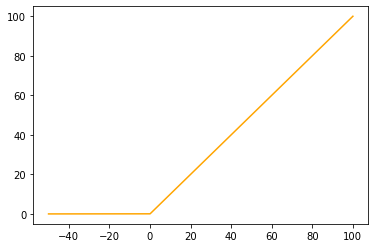

In [13]:
plt.plot(np.linspace(-50,100,5000),relu(np.linspace(-50,100,5000)),c = 'orange')

### Intializing Parameters of the Network

In [14]:
def initialize_params(layer_sizes):
    params = {} #defining paramets as dictionary which contains weights and biases as W and B in the prefix
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

params_temp = initialize_params([13,0,20,10,1])
params_temp

{'W1': array([], shape=(0, 13), dtype=float64),
 'B1': array([], shape=(0, 1), dtype=float64),
 'W2': array([], shape=(20, 0), dtype=float64),
 'B2': array([[-0.00012035],
        [-0.0227865 ],
        [-0.00306541],
        [ 0.01157597],
        [ 0.00236929],
        [-0.00151335],
        [ 0.01200181],
        [ 0.0081175 ],
        [ 0.00765881],
        [ 0.0115563 ],
        [-0.00216324],
        [-0.00683033],
        [-0.00396234],
        [-0.0030371 ],
        [-0.00350461],
        [-0.00830323],
        [ 0.00760731],
        [ 0.00077705],
        [ 0.00289263],
        [-0.00261077]]),
 'W3': array([[-7.64125607e-03, -6.05387041e-03,  9.06671727e-03,
         -3.12343392e-02, -1.47903325e-02, -3.96997335e-03,
          8.79135415e-04, -9.48831309e-04,  8.61220108e-03,
          1.81479535e-03,  8.69753415e-03, -1.96945784e-03,
         -8.05062786e-03,  2.68217289e-02,  1.73738111e-02,
         -7.82148818e-03,  5.82152226e-03,  7.62682311e-03,
         -2.83603330e-0

### Forward Propagation

In [15]:
def forward_propagation(X_train, params):
    layers = len(layer_sizes)-1 # Defining the number of layers
    values = {} #defining as dictionary to store the values of Z and Activations required for the backpropagations
    
    for i in range(1, layers+1):
        if i==1: #for first layer, the imput is multiplied with weights and aDDED with bias
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            values['A' + str(i)] = relu(values['Z' + str(i)]) #computing activations
        else:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers: #for last layer, activations are computed without applying relu
                values['A' + str(i)] = values['Z' + str(i)]
            else:
                values['A' + str(i)] = relu(values['Z' + str(i)])
    return values

# val = forward_propagation(x_train.T,params_temp)

### Compute COst

In [17]:
def compute_cost(values, Y_train): #mean squared error computation
    layers = len(layer_sizes)-1
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * (np.sum(np.square(Y_pred - Y_train)))
    return cost

### Back Propagation

In [18]:
def backward_propagation(params, values, X_train, Y_train):
    layers = len(layer_sizes)-1
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers: #for last layer dz = da as no relu non-linearity has been applied
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ) #for internal layers multiply the dz of next layer with the weights
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0)) # calculate dz using relu concept of backprop on da
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

### Upgrade parameters with Gradients

In [19]:
def update_params(params, grads, learning_rate):
    layers = len(layer_sizes)-1
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

### Compute test loss

In [20]:
def compute_test_loss(x_test,y_test, params):
    values_train = forward_propagation(x_test.T, params)
    test_loss = np.sqrt(mean_squared_error(y_test, values_train['A' + str(len(layer_sizes)-1)].T))
    return test_loss

### Prediction

In [21]:
def predict(X, params):
    values = forward_propagation(X.T, params)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

### Conjuring Up a Neural Network

In [22]:
def model(X_train, Y_train, layer_sizes, num_iters, learning_rate):
    train_loss = []
    test_loss = []
    params = initialize_params(layer_sizes)
    
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        
        cost = compute_cost(values, Y_train.T)
        test_cost = compute_test_loss(x_test,y_test,params)
        
        train_loss.append(cost)
        test_loss.append(test_cost)
        
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        
        if(i%100 == 0):
            print("Current Learning Rate is : {}".format(learning_rate))
            print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
            if(i!=0):
                learning_rate = learning_rate*0.95 #learning rate scheduler
    
    fig, ax = plt.subplots(1,2, figsize = (15,8))
    
    ax[0].plot(range(num_iters),train_loss)
    ax[0].set_title("training loss trend")
    ax[1].plot(range(num_iters),test_loss, color = 'red')
    ax[1].set_title("test loss trend")
    
    return params

Current Learning Rate is : 0.5
Cost at iteration 1 = 0.5000275899922761

Current Learning Rate is : 0.5
Cost at iteration 101 = 0.5000112716541517

Current Learning Rate is : 0.475
Cost at iteration 201 = 0.500004814193549

Current Learning Rate is : 0.45125
Cost at iteration 301 = 0.5000021458618089

Current Learning Rate is : 0.42868749999999994
Cost at iteration 401 = 0.5000009961477465

Current Learning Rate is : 0.40725312499999994
Cost at iteration 501 = 0.500000480688724

Current Learning Rate is : 0.38689046874999994
Cost at iteration 601 = 0.5000002407050018

Current Learning Rate is : 0.3675459453124999
Cost at iteration 701 = 0.5000001249003129

Current Learning Rate is : 0.34916864804687486
Cost at iteration 801 = 0.5000000670850306

Current Learning Rate is : 0.3317102156445311
Cost at iteration 901 = 0.50000003727334

Current Learning Rate is : 0.31512470486230454
Cost at iteration 1001 = 0.5000000214225415

Current Learning Rate is : 0.2993684696191893
Cost at iteration 

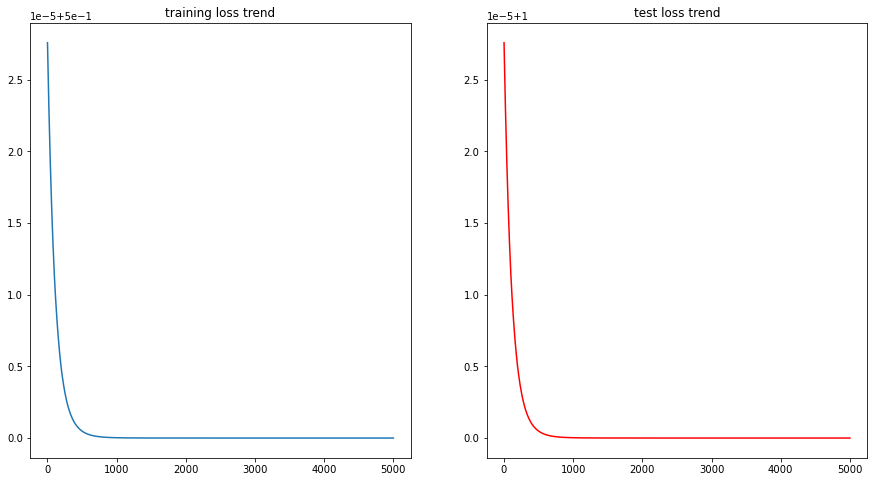

In [23]:
layer_sizes = [7, 32, 64, 32, 8, 1]            #set layer sizes ; size of the first and last layer must\
                                                #be according to the features and expected output dimensions
num_iters = 5000                                 #set number of training iterations over
learning_rate = 0.5                              #set learning rate for gradient descent
params = model(x_train, y_train, layer_sizes, num_iters, learning_rate)           #train the model on the traingin data
test_rmse= compute_test_loss(x_test, y_test, params)  #get training and test accuracy

print('Root Mean Squared Error on Testing Data = ' + str(test_rmse))

### Thank You